In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from Functions import segmentation as seg
from PIL import Image



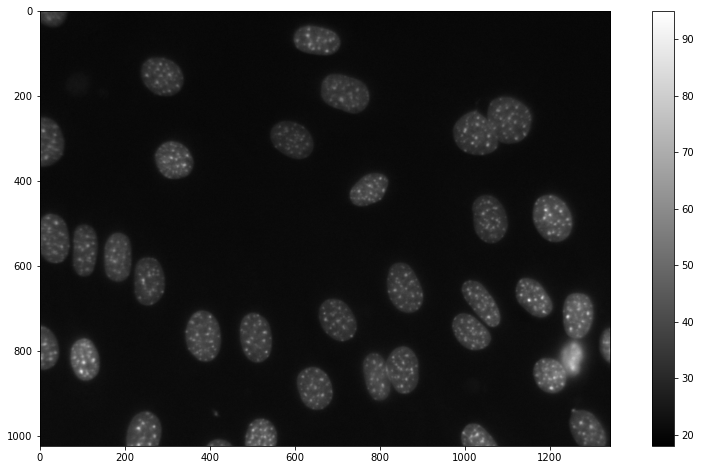

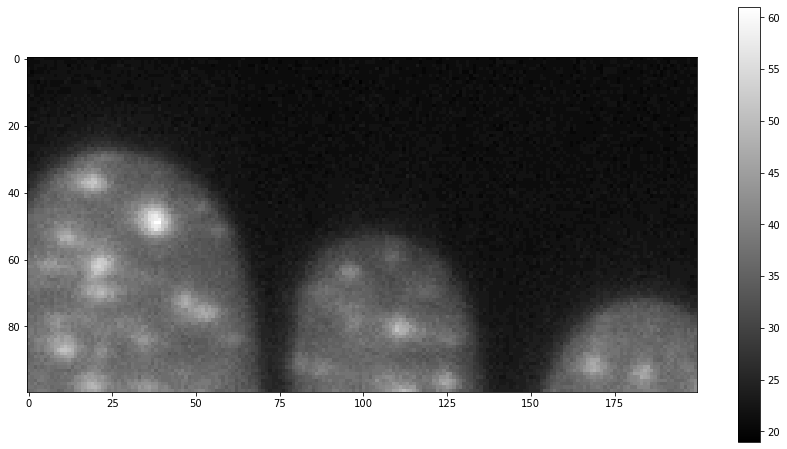

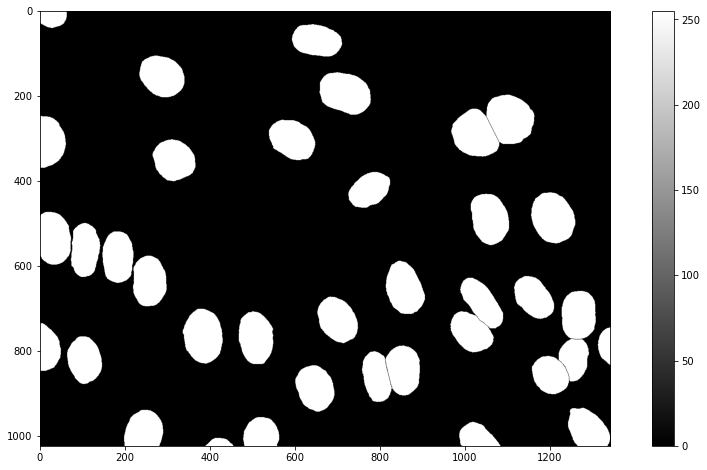

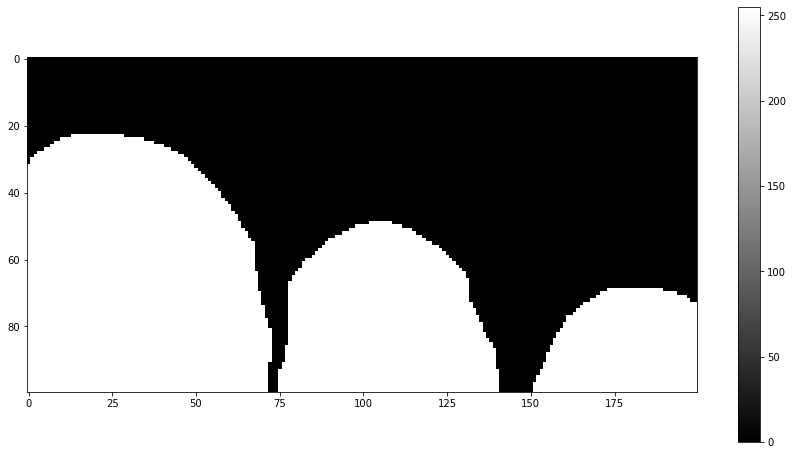

In [28]:
image = sk.imread("../Data/NIH3T3/img/dna-0.png")
ip.show_image(image, 15, 8)
image_small = image[450:550, 0:200]
ip.show_image(image_small, 15, 8)

ground_truth = sk.imread("../Data/NIH3T3/gt/0.png")
ip.show_image(ground_truth, 15, 8)
ground_truth_small = ground_truth[450:550, 0:200]
ip.show_image(ground_truth_small, 15, 8)

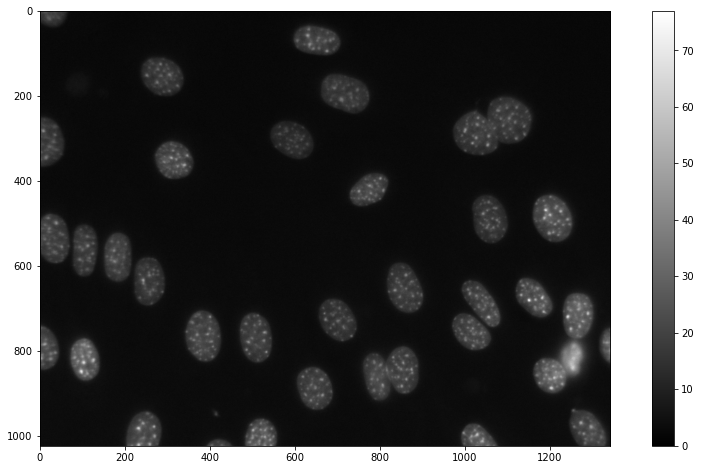

In [29]:
image_subtracted = ip.subtract_minimum(image)
ip.show_image(image_subtracted, 15, 8)

5000
10000
15000


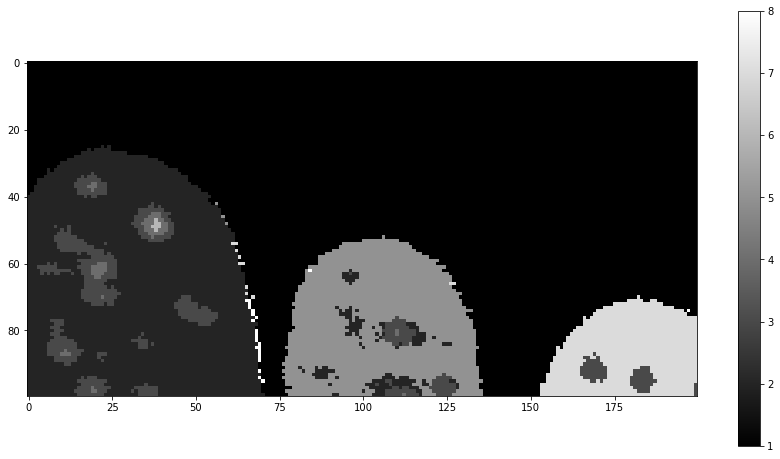

In [30]:
image_urg = urg.unseeded_region_growing_algorithm(image_small, (0, 0), 5)
ip.show_image(image_urg, 15, 8)

8
2
0.9506344712314445


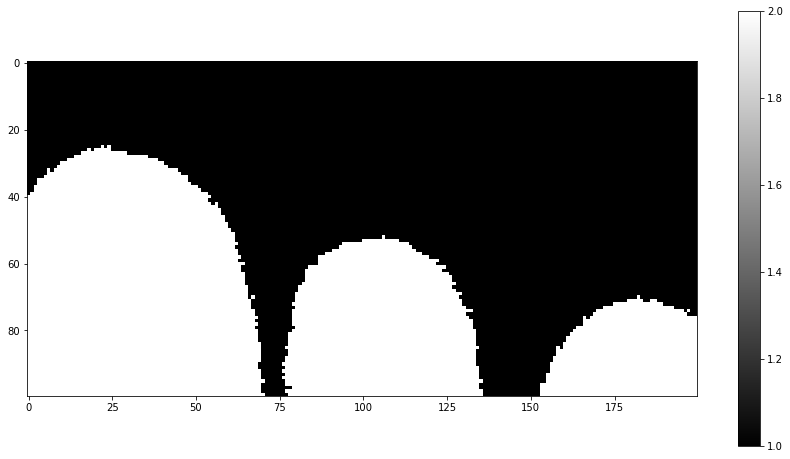

In [37]:
test3 = rm.region_merging(image_urg.copy(), image, 0.01, 100)
ip.show_image(test3, 15, 8)

score_merging = ds.evaluate_accuracy_weighted(test3, ground_truth_small)
print(score_merging)

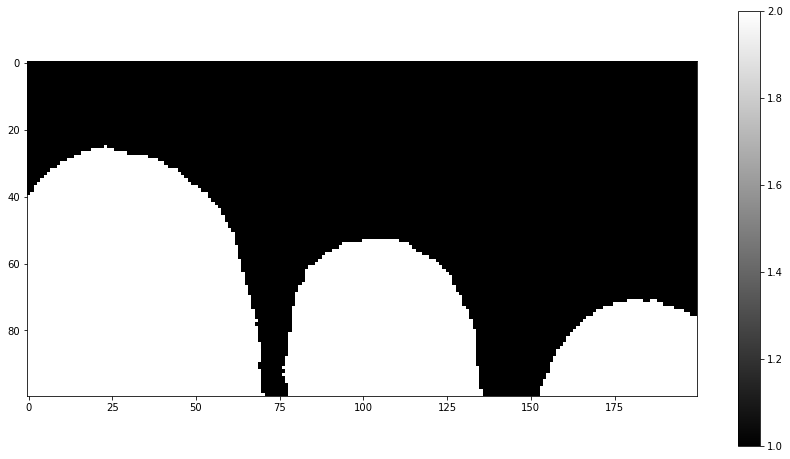

In [40]:
test4 = ip.median_filter(test3, 3)
ip.show_image(test4, 15, 8)

0.9503688802055903
0.95185


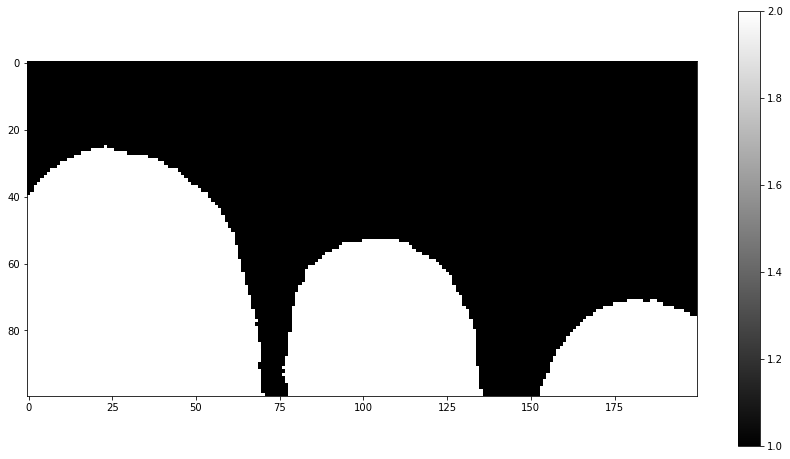

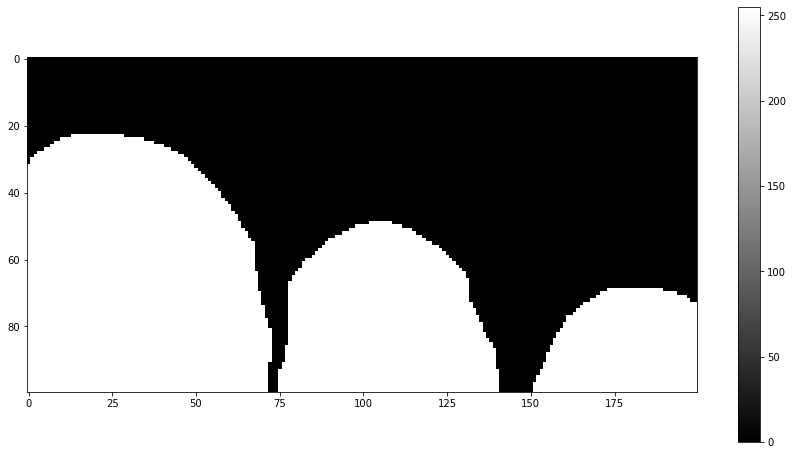

In [41]:
score = ds.evaluate_accuracy_weighted(test4, ground_truth_small)
print(score)
score2 = ds.evaluate_accuracy_unweighted(test4, ground_truth_small)
print(score2)
ip.show_image(test4, 15, 8)
ip.show_image(ground_truth_small, 15, 8)

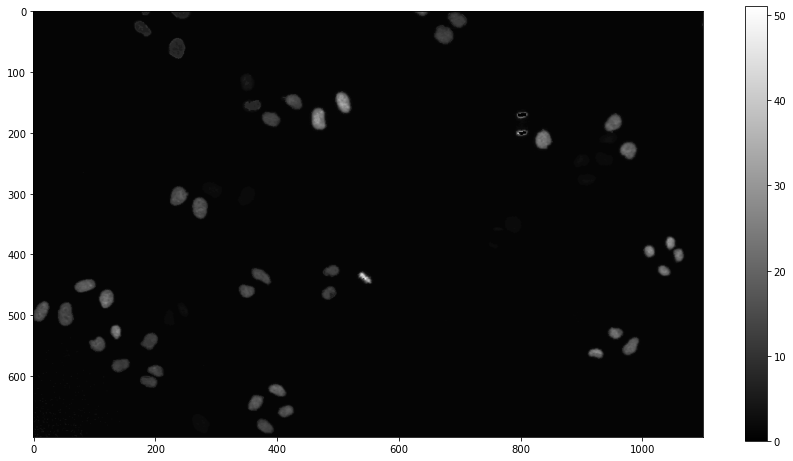

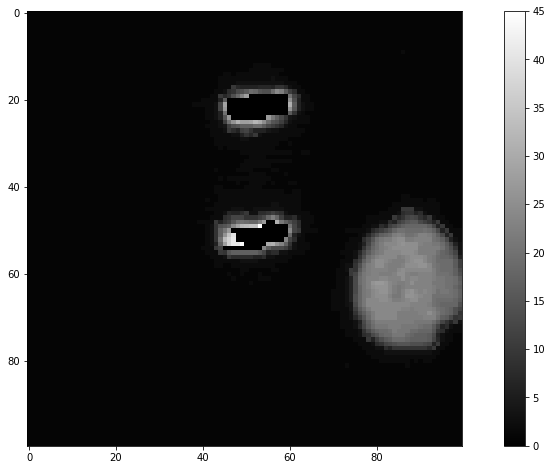

In [4]:
result_urg = sk.imread("../Result_Pictures/Unseeded_Region_Growing/N2DL-HeLa/urg_t13.tif")
ip.show_image(result_urg, 15, 8)

result_small = result_urg[150:250, 750:850]
ip.show_image(result_small, 15, 8)

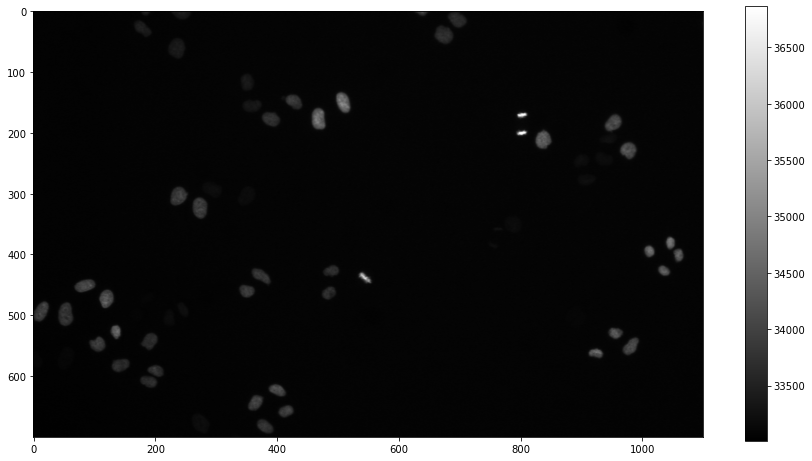

In [22]:
hela = sk.imread("../Data/N2DL-HeLa/img/t13.tif")
ip.show_image(hela, 15, 8)

hela_small = hela[160:185, 790:815]

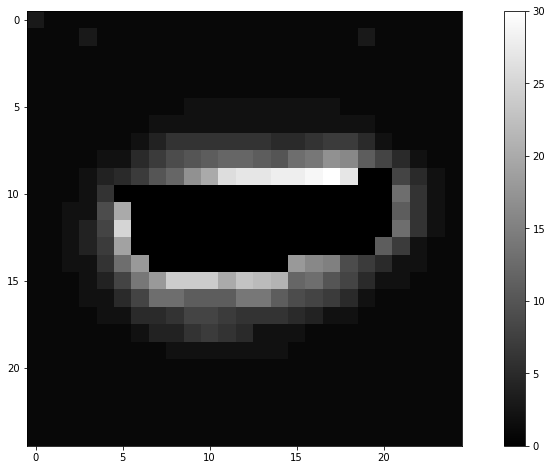

In [23]:
hela_urg = urg.unseeded_region_growing_algorithm(hela_small, (0,0), 50)
ip.show_image(hela_urg, 15, 8)